EDA
=====

택시 요금 데이터 살펴보기
-----------------

In [1]:
import pandas as pd
import numpy as np

DATA_PATH = './taxi_fair_data.csv'

def load_csv(path):
    # pandas를 이용하여 'taxi_fair_data.csv' 데이터를 불러옵니다.
    data_frame = pd.read_csv(path)
    return data_frame

def statistical_features(data):
    # numpy를 이용하여 (리스트)데이터의 통계적 정보를 추출합니다.
    _min = np.min(data)
    _max = np.max(data)
    _mean = np.mean(data)
    _median = np.median(data)
    _var = np.var(data)
    _std = np.std(data)
    
    return _min, _max, _mean, _median, _var, _std


df=load_csv(DATA_PATH)
#전체 데이터에 대한 요약 정보를 살펴봅니다.
df.info()

#'fare_amount'변수에 대한 통계적 정보를 살펴봅니다.
_min, _max, _mean, _median, _var, _std = statistical_features(df['fare_amount'])
print('fare_amount','의', '최솟값:', _min ,'최댓값:', _max ,'평균값:', _mean ,'중앙값:', _median ,'분산값:', _var ,'표준편차값:', _std)

#'passenger_count'변수에 대한 통계적 정보를 살펴봅니다.
_min, _max, _mean, _median, _var, _std = statistical_features(df['passenger_count'])
print('passenger_count','의', '최솟값:', _min ,'최댓값:', _max ,'평균값:', _mean ,'중앙값:', _median ,'분산값:', _var ,'표준편차값:', _std)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Unnamed: 0           1000 non-null int64
id                   1000 non-null int64
pickup_datetime      1000 non-null object
pickup_latitude      1000 non-null int64
pickup_longitude     1000 non-null int64
dropoff_latitude     991 non-null float64
dropoff_longitude    992 non-null float64
passenger_count      1000 non-null int64
fare_amount          1000 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB
fare_amount 의 최솟값: -100 최댓값: 99 평균값: 45.102 중앙값: 48.0 분산값: 1147.2855959999995 표준편차값: 33.871604567838226
passenger_count 의 최솟값: -2 최댓값: 5 평균값: 1.424 중앙값: 1.0 분산값: 5.1902239999999775 표준편차값: 2.2782063119919536


누락 데이터 탐지 및 제거
---------------

In [16]:
import pandas as pd
import numpy as np

DATA_PATH = './taxi_fair_data.csv'

# pandas를 이용하여 데이터를 DataFrame의 형태로 불러옵니다.
df=pd.read_csv('taxi_fair_data.csv')

print("누락된 데이터(Missing Data)를 제거하기 전의 데이터 정보")
df.info()
print()

def remove_NaN(df_data):
    index_remove=[]
    for key in df_data.keys(): # features
        for i, data in enumerate(df_data[key]):
            # pandas의 함수를 이용하여 Null값 또는 NaN 값을 찾고, 그 값의 인덱스를 index_remove에 추가합니다.
            if pd.isna(data) == True:
                index_remove.append(i)
    index_remove = list(set(index_remove))
    print('Nan값이 있는 index :', index_remove, '\n')
    #index_remve의 인덱스들에 해당하는 df_data의 행을 제거합니다.
    removed_data = df_data.drop(index_remove)
    
    return removed_data

# 누락된 데이터를 제거한 후의 DataFrame의 정보를 확인합니다.
removed_df=remove_NaN(df)
print("누락된 데이터(Missing Data)를 제거한 후의 데이터 정보")
removed_df.info()
print()

# 불필요한 변수('Unnamed: 0')를 제거합니다.
print('불필요한 변수(Unnamed: 0)를 제거한 후의 데이터 정보')
df = removed_df.drop(columns='Unnamed: 0')
df.info()

누락된 데이터(Missing Data)를 제거하기 전의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Unnamed: 0           1000 non-null int64
id                   1000 non-null int64
pickup_datetime      1000 non-null object
pickup_latitude      1000 non-null int64
pickup_longitude     1000 non-null int64
dropoff_latitude     991 non-null float64
dropoff_longitude    992 non-null float64
passenger_count      1000 non-null int64
fare_amount          1000 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB

Nan값이 있는 index : [96, 34, 36, 6, 7, 103, 48, 80, 150] 

누락된 데이터(Missing Data)를 제거한 후의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 9 columns):
Unnamed: 0           991 non-null int64
id                   991 non-null int64
pickup_datetime      991 non-null object
pickup_latitude      991 non-null int64
pickup_longitude     991 non-null int64
dropoff_latitude     99

이상치(Outlier) 제거
-------------

In [14]:
import pandas as pd
import numpy as np

DATA_PATH = "./rm_data.csv"

#데이터를  DataFram의 형태로 불러옵니다.
df=pd.read_csv(DATA_PATH, quoting=3)

#불러온 DataFrame의 각 인덱스의 값들을 변수로 저장합니다.
fare_amount = df['fare_amount']
passenger_count = df['passenger_count']
pickup_longitude = df['pickup_longitude']
pickup_latitude=df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']


# 리스트를 입력으로 받아서 해당 리스트 내에 음수값이 있으면 그 위치(인덱스)들을 리스트로 출력하는 함수를 만듭니다.  
def get_negative_index(list_data):
    neg_idx=[]
    
    for i, value in enumerate(list_data):
        ## 음수값이 있으면 그 위치(인덱스)들을 neg_idx로 추가시킵니다.
        if value < 0:
            neg_idx.append(i)
            
    return neg_idx


# DataFrame 내에 제거해야 하는 이상치의 인덱스를 반환하는 함수를 만듭니다.
def outlier_index():
    ## get_negative_index() 함수를 통해서, fare_amount와 passenger_count 내의 음수값들의 인덱스를 반환합니다.
    idx_fare_amount = get_negative_index(fare_amount)
    idx_passenger_count = get_negative_index(passenger_count)
    
    idx_zero_distance=[]    
    idx= [i for i in range(len(passenger_count))]
    zipped = zip(idx, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)
    
    for i, x, y, _x, _y in zipped:
        # 타는 곳(pickup_longitude,pickup_latitude)과 내리는 곳(drop_longitude, drop_latitude)이 
        # 같은 데이터의 인덱스를 idx_zero_distance에 저장합니다.
        if (x == _x) and (y == _y):
            idx_zero_distance.append(i)
    
    ##제거해야하는 인덱스의 리스트들(idx_fare_amount,idx_passenger_count,idx_zero_distance) 간의 중복을 없앤 리스트를 만들어줍니다.
    total_index4remove = list(set(idx_fare_amount+idx_passenger_count+idx_zero_distance))
    print('fare_amount값이 음수인 index 수 : ', len(idx_fare_amount))
    print('passenger_count값이 음수인 index 수 :', len(idx_passenger_count))
    print('pickup과 dropoff의 거리가 0인 index 수 :', len(idx_zero_distance), '\n')
    
    return total_index4remove


# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만듭니다.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)

## 이상치 제거하기 전의 데이터 정보를 확인해 봅시다.
print('이상치를 제거하지 전의 데이터 정보')
df.info()
print()

## 이상치를 제거합니다.
remove_index = outlier_index()
new=remove_outlier(df, remove_index)

##이상치를 제거한 후의 데이터를 살펴봅니다.
print('이상치를 제거한 후의 데이터 정보')
new.info()

이상치를 제거하지 전의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 10 columns):
Unnamed: 0           991 non-null int64
Unnamed: 0.1         991 non-null int64
id                   991 non-null int64
pickup_datetime      991 non-null object
pickup_latitude      991 non-null int64
pickup_longitude     991 non-null int64
dropoff_latitude     991 non-null float64
dropoff_longitude    991 non-null float64
passenger_count      991 non-null int64
fare_amount          991 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 77.5+ KB

fare_amount값이 음수인 index 수 :  38
passenger_count값이 음수인 index 수 : 245
pickup과 dropoff의 거리가 0인 index 수 : 5 

이상치를 제거한 후의 데이터 정보
<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 989
Data columns (total 10 columns):
Unnamed: 0           713 non-null int64
Unnamed: 0.1         713 non-null int64
id                   713 non-null int64
pickup_datetime      713 non-null object
pickup_latitude

데이터를 변형하기
--------------

In [17]:
import numpy as np
import pandas as pd

df=pd.read_csv("rm_data.csv", quoting=3)

#불러온 pickup_datetime은 ['2009-06-15 17:26:21 UTC', ...] 과 같은 형태를 지니고 있습니다.
pickup_datetime = df['pickup_datetime'] 

year_date=[pickup.split()[0] for pickup in pickup_datetime]
time=[pickup.split()[1] for pickup in pickup_datetime]

# 우선 연월일('YYYY-MM-DD')와 시간('HH:MM:SS')로 나누어 주고 이를 year_date, time 변수로 각각 넣어줍니다.


years=[year.split('-')[0] for year in year_date]
months=[year.split('-')[1] for year in year_date]
days=[year.split('-')[2] for year in year_date]

#연월일 변수에서 각각의 '연도', '월', '일'을 추출하여 years, months, days 변수에 넣어줍니다.


#시간만 따로 int의 형태로 추출합니다.
hours=[int(t.split(':')[0])for t in time]

#각 변수의 상위 10개 씩만 출력해서 출력이 제대로 되었는지 확인해봅시다.
print(years[:10])
print(months[:10])
print(days[:10])
print(hours[:10])

['2015', '2015', '2017', '2017', '2017', '2015', '2015', '2015', '2017', '2015']
['01', '10', '05', '05', '04', '04', '07', '03', '04', '09']
['07', '21', '07', '14', '11', '26', '21', '04', '24', '15']
[15, 22, 3, 9, 16, 3, 7, 14, 6, 20]


데이터 시각화
-------------

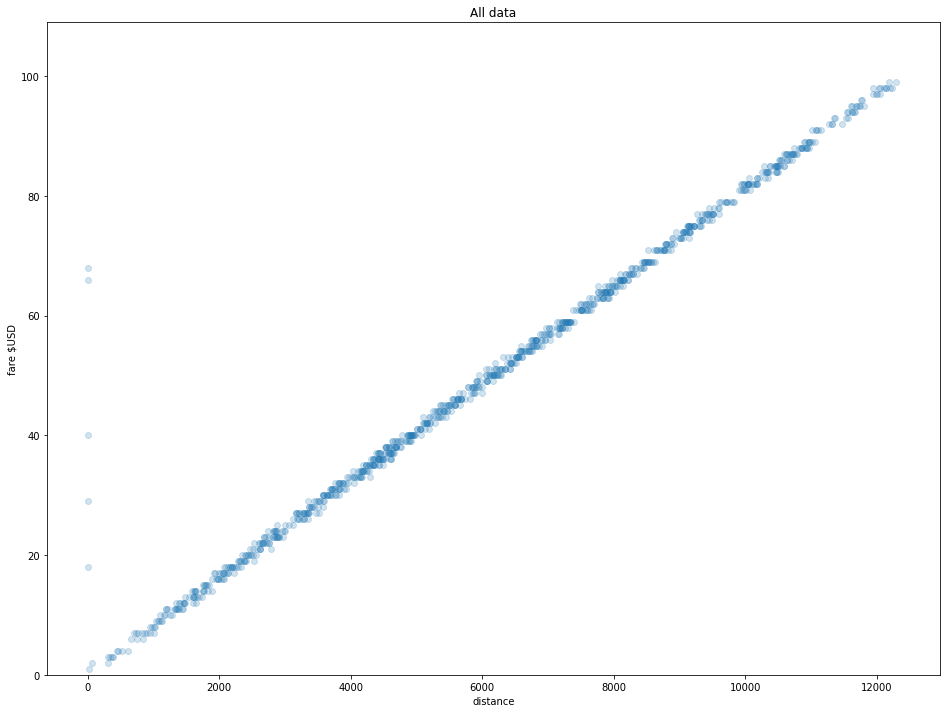

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('rm_data.csv', quoting=3)

pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

def distance(pick_lat, pick_lon, drop_lat, drop_lon):
    p = 0.0174 ## Pi/180
    ## Haversine Formula
    a = 0.5 - np.cos((drop_lat - pick_lat) * p)/2 + np.cos(pick_lat * p) * np.cos(drop_lat * p) * (1 - np.cos((drop_lon - pick_lon) * p)) / 2
    return 0.621 * 12742 * np.arcsin(np.sqrt(a))

#1.distance 함수를 이용하여 각각의 타는 곳(pickup_longitude, pickup_latitude)과 내리는 곳(dropoff_longitude, dropoff_latitude) 간의 거리를 계산하여, 이를 리스트로 만들어봅시다.
list_distance = distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude)

#만들어진 거리를 DataFrame 내에 추가합니다.
df['distance'] = list_distance


#2.subplots를 활용하여 1행 1열의 figsize가 (16,12)인 그래프를 만듭니다.
fig, axs = plt.subplots(figsize = (16,12))

axs.scatter(df.distance, df.fare_amount, alpha=0.2)
axs.set_xlabel('distance')
axs.set_ylim(0,)
axs.set_ylabel('fare $USD')
axs.set_title('All data')

plt.savefig("result.png")

미션! 데이터 분석 해보기
-----

In [21]:
import numpy as np
import pandas as pd

DATA_PATH = './test_data.csv'

#pandas를 사용하여 데이터를 로드하고 이를 반환하는 함수를 만들어 보세요.
def load_csv(path):
    data_frame = pd.read_csv(path)
    return data_frame

# DataFrame 내의 누락된 데이터를 찾고 이를 제거하는 함수를 만들어 보세요.
def remove_NaN(df_data):
    index_remove=[]    
    for key in df_data.keys():
        for i, data in enumerate(df_data[key]):
            # pandas의 함수를 이용하여 Null값 또는 NaN 값을 찾고, 그 값의 인덱스를 index_remove에 추가합니다.
            if pd.isna(data) == True:
                index_remove.append(i)
                
    index_remove = list(set(index_remove))
    removed_data = df_data.drop(index_remove)
    return removed_data
    
# 데이터의 최솟값, 최댓값, 평균값(순서대로)을 반환하는 함수를 Numpy를 이용하여 만들어 보세요.
def statistical_features(data):
    _min = np.min(data)
    _max = np.max(data)
    _mean = np.mean(data)
    return _min, _max, _mean 

# 이상치를 찾고 이에 대응되는 인덱스를 반환하는 함수를 만들어 보세요.
def outlier_index(list_data):
    neg_idx=[]
    
    for i, value in enumerate(list_data):
        ## 음수값이 있으면 그 위치(인덱스)들을 neg_idx로 추가시킵니다.
        if value < 0 or value > 100:
            neg_idx.append(i)
            
    return neg_idx

# 인덱스를 기반으로 DataFrame 내의 데이터를 제거하고, 제거된 DataFrame을 반환하는 함수를 만들어 보세요.
def remove_outlier(dataframe, list_idx):
    return dataframe.drop(list_idx)


def main():
    # 데이터를 로드합니다.
    df = load_csv(DATA_PATH)
    # 누락된 값을 제거합니다.
    nan_rm_df = remove_NaN(df)
    
    # 제거가 잘 되었는지 확인합니다.('실행'시에만)
    nan_rm_df.info()
    
    # english,math, korean, ethics에 대한 통계적 정보를 변수로 저장합니다.
    stat_eng = statistical_features(nan_rm_df['english'])
    stat_math = statistical_features(nan_rm_df['math'])
    stat_kor = statistical_features(nan_rm_df['korean'])
    stat_eths = statistical_features(nan_rm_df['ethics'])
    
    #이상치(0보다 작거나 100보다 큰 데이터)를 가진 데이터의 DataFrame 내의 인덱스(위치)를 리스트로 각각 저장합니다. 
    idx_outlier_eng = outlier_index(nan_rm_df['english'])
    idx_outlier_math = outlier_index(nan_rm_df['math'])
    idx_outlier_kor = outlier_index(nan_rm_df['korean'])
    idx_outlier_eths = outlier_index(nan_rm_df['ethics'])
    
    #이상치를 가진 데이터의 위치 인덱스를 중복이 없는 리스트가 되도록 변환합니다.
    idx_outlier_total = list(set(idx_outlier_eng+idx_outlier_math+idx_outlier_kor+idx_outlier_eths))
    
    #이상치의 인덱스(리스트)를 기준으로 DataFrame 내의 행 데이터를 제거하고 이를 변수로 저장합니다.
    removed_df = remove_outlier(nan_rm_df,idx_outlier_total)

    #제거가 잘 되었는지 확인합니다.('실행'시에만)
    removed_df.info()
    
    return stat_eng, idx_outlier_eng, idx_outlier_math, idx_outlier_kor, idx_outlier_eths, removed_df
    
main()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 99
Data columns (total 5 columns):
id         92 non-null int64
english    92 non-null float64
math       92 non-null float64
korean     92 non-null float64
ethics     92 non-null float64
dtypes: float64(4), int64(1)
memory usage: 4.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 99
Data columns (total 5 columns):
id         86 non-null int64
english    86 non-null float64
math       86 non-null float64
korean     86 non-null float64
ethics     86 non-null float64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


((0.0, 100.0, 52.641304347826086),
 [],
 [7, 18, 42],
 [12],
 [8, 56],
        id  english  math  korean  ethics
 0   10000      0.0  56.0    19.0    81.0
 1   10001     59.0  48.0    35.0    90.0
 2   10002     83.0  75.0    17.0    86.0
 3   10003     71.0  51.0    30.0     1.0
 4   10004      9.0  36.0    14.0    16.0
 5   10005     99.0  45.0    12.0     0.0
 6   10006      0.0  38.0    53.0    57.0
 9   10009     16.0  28.0    57.0    12.0
 10  10010     66.0  68.0    76.0    37.0
 11  10011     45.0  72.0    48.0    84.0
 14  10014     61.0  10.0    47.0    37.0
 15  10015     79.0  95.0    85.0    32.0
 16  10016     81.0  93.0    46.0    27.0
 17  10017     52.0  55.0    99.0    30.0
 19  10019     88.0 -42.0    19.0    76.0
 20  10020     73.0  84.0    40.0    50.0
 21  10021     96.0  89.0     2.0   100.0
 22  10022     93.0  57.0     5.0    53.0
 23  10023     54.0  19.0    85.0    63.0
 24  10024     14.0  66.0    19.0    85.0
 25  10025     46.0  12.0    11.0    75.0
 27  

Kaggle : Titanic
    -------------

In [2]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
for col in df_train.columns:
    msg = '항목 : {:>10}\t 비어있는 자료의 비율 : {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

항목 : PassengerId	 비어있는 자료의 비율 : 0.00%
항목 :   Survived	 비어있는 자료의 비율 : 0.00%
항목 :     Pclass	 비어있는 자료의 비율 : 0.00%
항목 :       Name	 비어있는 자료의 비율 : 0.00%
항목 :        Sex	 비어있는 자료의 비율 : 0.00%
항목 :        Age	 비어있는 자료의 비율 : 19.87%
항목 :      SibSp	 비어있는 자료의 비율 : 0.00%
항목 :      Parch	 비어있는 자료의 비율 : 0.00%
항목 :     Ticket	 비어있는 자료의 비율 : 0.00%
항목 :       Fare	 비어있는 자료의 비율 : 0.00%
항목 :      Cabin	 비어있는 자료의 비율 : 77.10%
항목 :   Embarked	 비어있는 자료의 비율 : 0.22%


In [8]:
for col in df_test.columns:
    msg = '항목 : {:>10}\t 비어있는 자료의 비율 : {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

항목 : PassengerId	 비어있는 자료의 비율 : 0.00%
항목 :     Pclass	 비어있는 자료의 비율 : 0.00%
항목 :       Name	 비어있는 자료의 비율 : 0.00%
항목 :        Sex	 비어있는 자료의 비율 : 0.00%
항목 :        Age	 비어있는 자료의 비율 : 20.57%
항목 :      SibSp	 비어있는 자료의 비율 : 0.00%
항목 :      Parch	 비어있는 자료의 비율 : 0.00%
항목 :     Ticket	 비어있는 자료의 비율 : 0.00%
항목 :       Fare	 비어있는 자료의 비율 : 0.24%
항목 :      Cabin	 비어있는 자료의 비율 : 78.23%
항목 :   Embarked	 비어있는 자료의 비율 : 0.00%


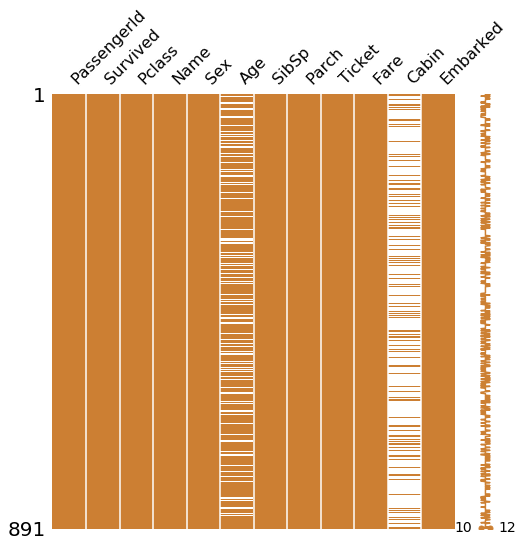

In [10]:
import missingno as msno
import matplotlib.pyplot as plt 
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8), color=(0.8, 0.5, 0.2))

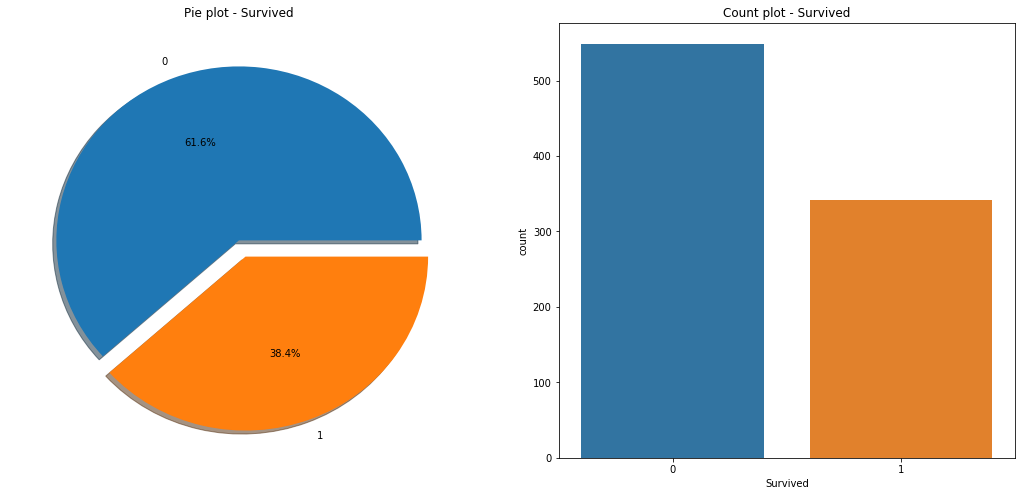

In [11]:
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=(0, 0.1), autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

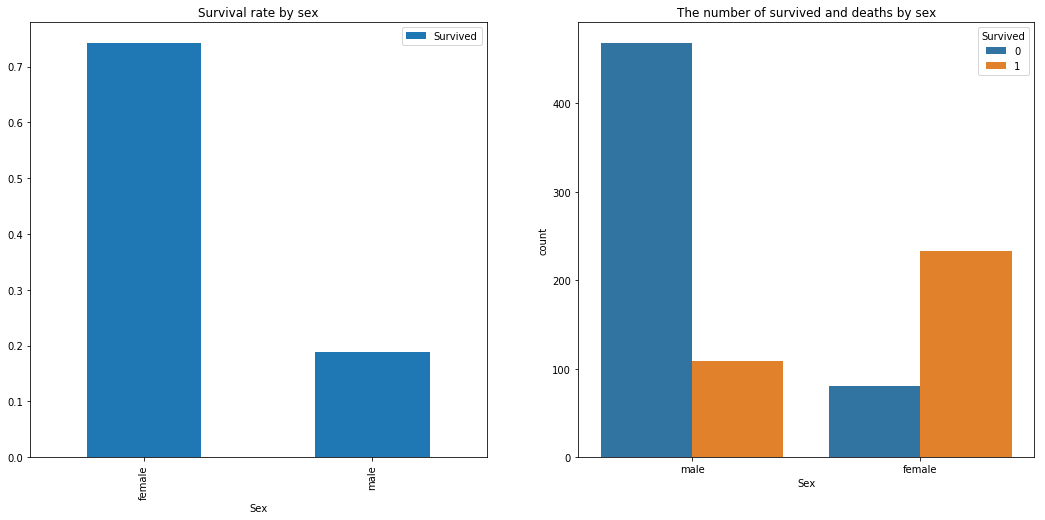

In [12]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survival rate by sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('The number of survived and deaths by sex')
plt.show()

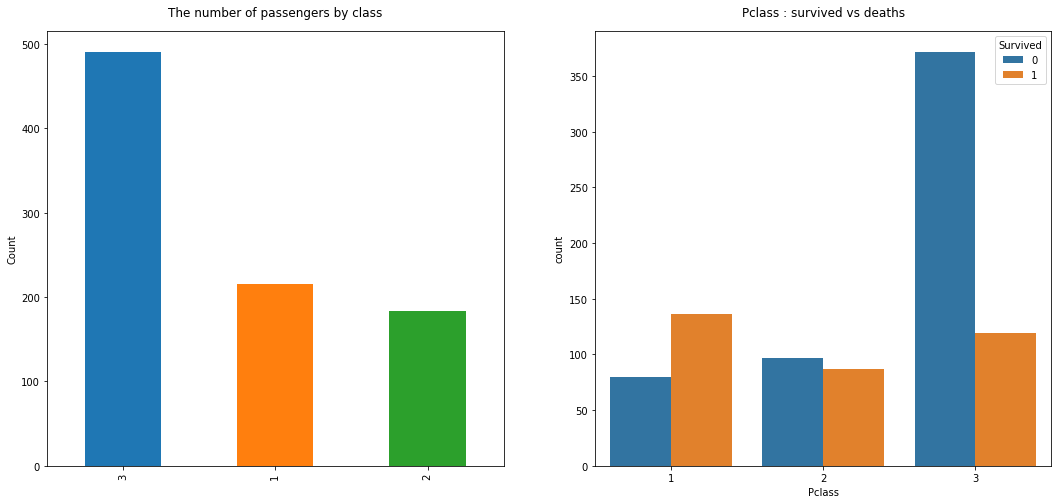

In [14]:
y_position = 1.02
fig, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('The number of passengers by class', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass : survived vs deaths', y=y_position)
plt.show()

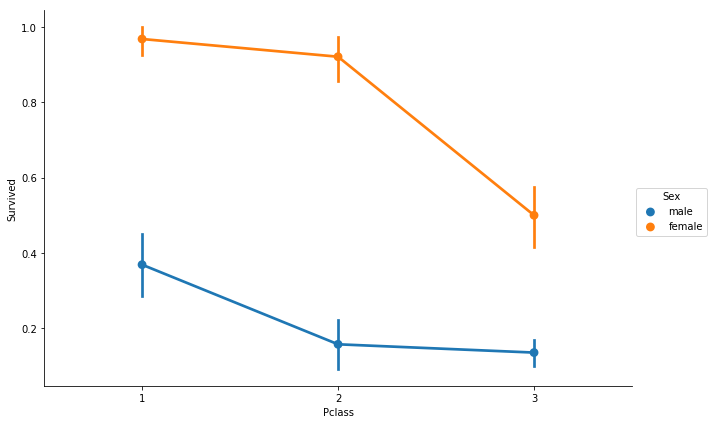

In [15]:
sns.factorplot('Pclass', 'Survived',hue='Sex', data=df_train, size=6, aspect=1.5)

Text(0,0.5,'Survived')

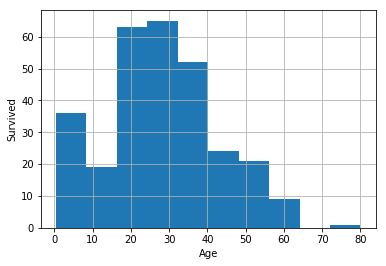

In [17]:
df_train[df_train['Survived'] == 1]['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Survived')

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


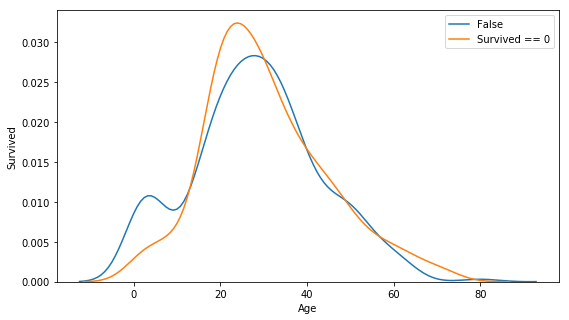

In [19]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived' == 1, 'Survived == 0'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

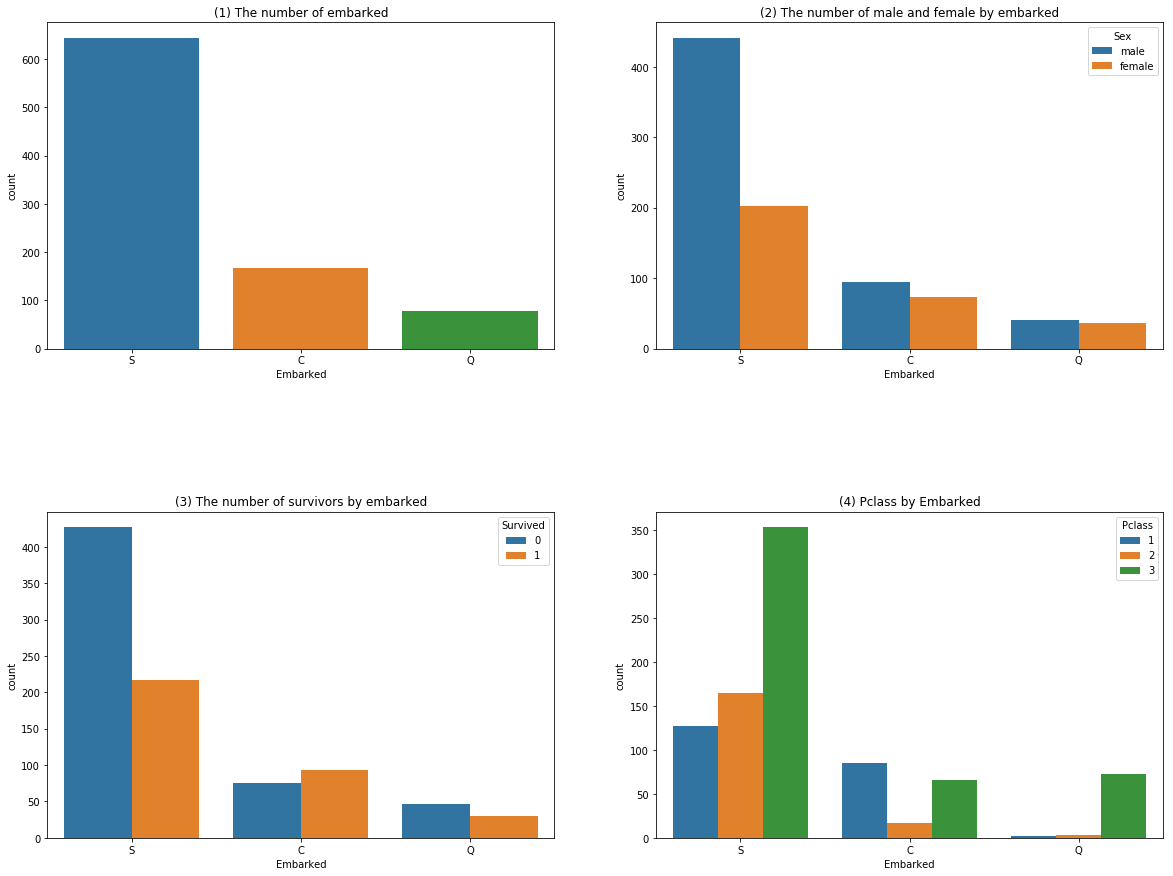

In [20]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) The number of embarked')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) The number of male and female by embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) The number of survivors by embarked')
sns.countplot('Embarked', hue = 'Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Pclass by Embarked')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

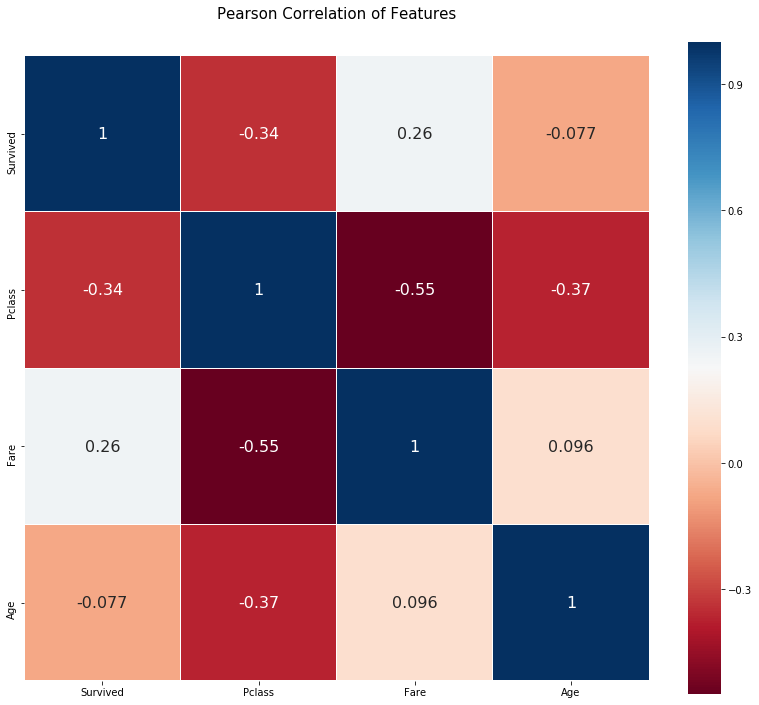

In [25]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked','Age']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.corr(), linewidth=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})

del heatmap_data